<h1> Week 3 Homework

<h2>Question 5.1</h2>
Using crime data from the file uscrime.txt (http://www.statsci.org/data/general/uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html), test to see whether there are any outliers in the last column (number of crimes per 100,000 people). Use the grubbs.test function in the outliers package in R.

<h2>Answr 5.1</h2>

In [1]:
# loading the dataset
# READ DATASET as DataFrame
df <- read.table("uscrime.txt", header = TRUE, sep = "\t")
# Display Data
head(df)
nrow(df)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


[1] 47

<p><p style="page-break-after:always;"></p></p>

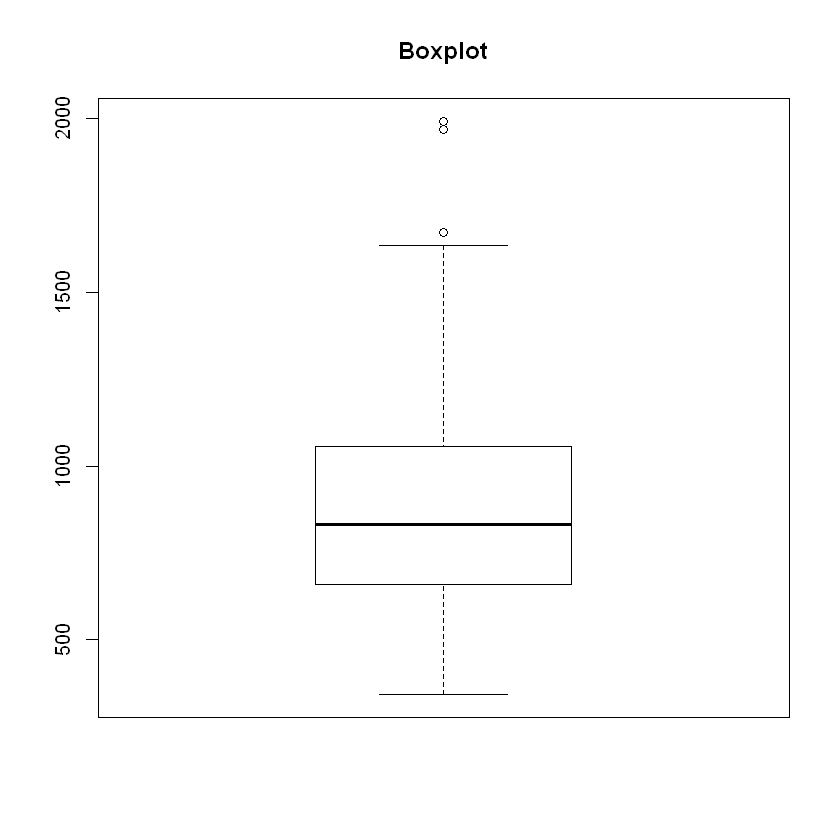

In [2]:
data <- df$Crime
# plot boxplot
boxplot(data)
title("Boxplot")

<b> From box plot, it is possible that there exists 2 - 3 outliers at the high end of the data with no possible outliers on the low end of the data </b>

<p><p style="page-break-after:always;"></p></p>

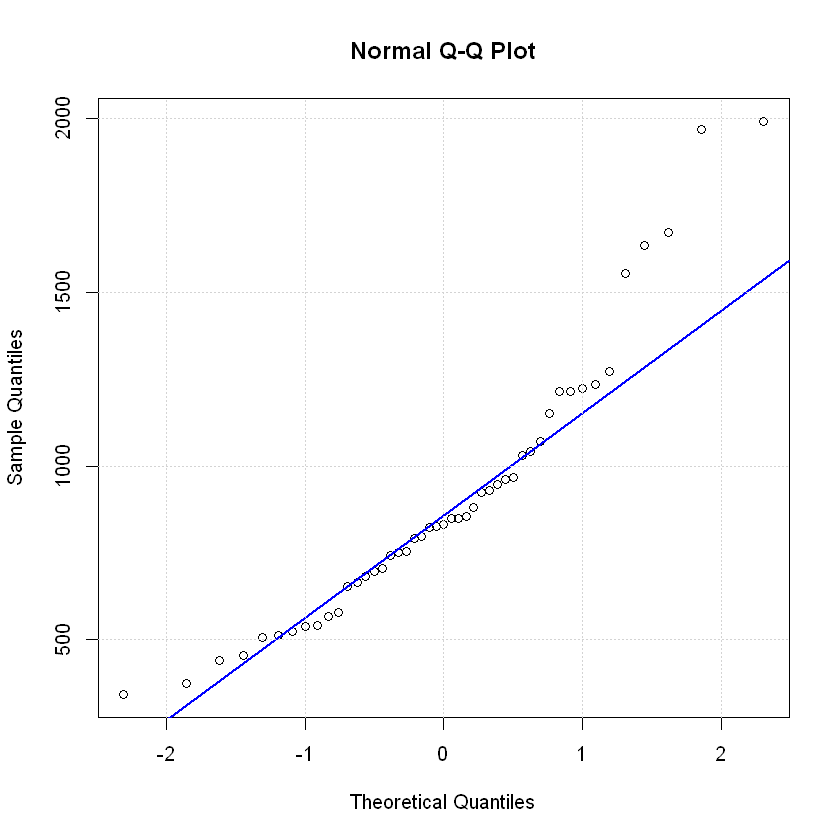

In [3]:
qqnorm(data)
qqline(data, col = "blue", lwd = 2)
grid()

<b> From Q-Q plot, The data appears to be normally distirbuted with skewness towards the high side (right-skewed or positively skewed) </b>

<p><p style="page-break-after:always;"></p></p>

In [4]:
# load required library
# install.packages("outliers")
library(outliers)
# conduct Grubbs tests for data sample
print("Testing lowest point for being an outlier using Grubbs test")
grubbs.test(data, type=10, opposite = TRUE)
print("Testing highest point for being an outlier using Grubbs test")
grubbs.test(data, type=10, opposite = FALSE)

[1] "Testing lowest point for being an outlier using Grubbs test"



	Grubbs test for one outlier

data:  data
G = 1.45589, U = 0.95292, p-value = 1
alternative hypothesis: lowest value 342 is an outlier


[1] "Testing highest point for being an outlier using Grubbs test"



	Grubbs test for one outlier

data:  data
G = 2.81287, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


<b> Conclusions </b>

Assuming a significance level of 0.05 (Default Value) in Grubbs test is acceptable. We can conclude the following:

1. Grubbs test for the lowest point (342) shows a p-value (probability value) = 1. As a result, aligned with box-plot, the minimum value is <b> NOT </b> an outlier with very high cetrainty.

2. Grubbs test for the highest point (1993) shows a p-value = 0.079. As a result, the highest point is <b> NOT </b> an outlier assuming a significance level of 0.05 (Default Value). This is not aligned with Box-Plot however that depends on the significane level accepted (the maximum acceptable level of risk for rejecting the null hypothesis, in our case the null hypothesis is the high point is not an outlier, i.e. miss-classifying a true point as an outlier).

In conclusion, Grubss test suggests there are NO points that can be identified as outliers in the data with a risk <=0.05. However if the accepeted significance level is changed from 5% to 10%, both highest points can be considered as outliers.

References:
https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/outlier-test/interpret-the-results/all-statistics-and-graphs/

<p><p style="page-break-after:always;"></p></p>

<h2>Question 6.1</h2>
Describe a situation or problem from your job, everyday life, current events, etc., for which a Change
Detection model would be appropriate. Applying the CUSUM technique, how would you choose the
critical value and the threshold?

<h2>Answr 6.1</h2>

In Petroleum Engineering, pipelines transporting hydrocarbon fluids are equipped with pressure and temperature sensors at multiple locations across their length. Changes in the sensors' readings are caused mainly by changes in flow regime in the pipeline due to ambient temperature changes, introduction of new wells production to the pipeline, etc. However, changes to the sensors' reading could indicate the start of pipeline blockage caused by scale or hydrates formation, etc. If the pipeline is completely plugged that would lead to loss of production with severe impact on operations stability until the problem is resolved.

Using the Cusum technique, we can analyze the sensors' readings over the history of the pipeline and optimize the the critical value and the threshold of the model until the real warning signs that occured historically of pipeline blockage can be accurately detected with suffcient lead time to help the operations team intervene and fix the problem with minimal interruption to production operations.

<p><p style="page-break-after:always;"></p></p>

<h2>Question 6.2</h2>

1. Using July through October daily-high-temperature data for Atlanta for 1996 through 2015, use a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts cooling off) each year. You can get the data that you need from the file temps.txt or online, for example at http://www.iweathernet.com/atlanta-weather-records or https://www.wunderground.com/history/airport/KFTY/2015/7/1/CustomHistory.html . You can use R if you’d like, but it’s straightforward enough that an Excel spreadsheet can easily do the job too.

2. Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).

<h2>Answr 6.2 Part 1</h2>

In [5]:
# loading the dataset
# READ DATASET as DataFrame
df <- as.data.frame(read.table("temps.txt", header = TRUE, sep = "\t", , stringsAsFactors=FALSE))
# Display Data
head(df)
nrow(df)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,...,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,...,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,...,81,87,82,87,89,90,98,83,87,84


[1] 123

In [6]:
# New Data frame with day converted to numbers for easier handling
new_df <- df
new_df$DAY <- seq(1,nrow(new_df))
head(new_df)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79
4,90,91,91,88,95,84,89,86,88,...,91,86,90,91,85,92,98,77,84,85
5,89,84,91,90,96,86,93,80,90,...,90,88,88,80,88,90,100,83,86,84
6,93,84,89,91,96,87,93,84,90,...,81,87,82,87,89,90,98,83,87,84


Analysis for all years average data for visual understanding

In [7]:
# convert annual data to average temperature (Note exclude column 1 "DAY")
mean_temp_df <- as.data.frame(rowMeans(new_df[,2:ncol(new_df)]))
# convert date to day sequence for easier plotting
mean_temp_df$DAY <- seq(1:nrow(new_df))
# change Columns names
colnames(mean_temp_df) <- c("AVG_temp_day", "DAY")
# find mean of all data
print("Average Temperature")
mean_avg_temp <- round(mean(mean_temp_df$AVG_temp_day),3)
mean_avg_temp
print("Temperature appears to deviate at around day 60 which is: ")
df[60,"DAY"]
print("Temperature drops below average at around day 80 which is: ")
df[80,"DAY"]

[1] "Average Temperature"


[1] 83.339

[1] "Temperature appears to deviate at around day 60 which is: "


[1] "29-Aug"

[1] "Temperature drops below average at around day 80 which is: "


[1] "18-Sep"

<p><p style="page-break-after:always;"></p></p>

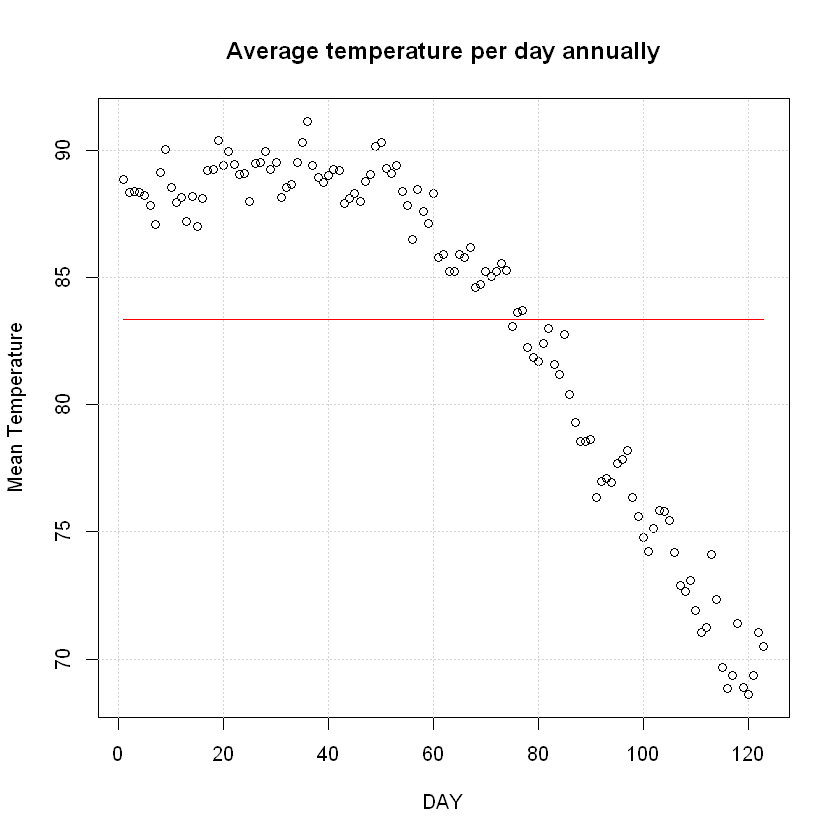

In [8]:
# plot results
plot(mean_temp_df$DAY, mean_temp_df$AVG_temp_day, xlab="DAY", ylab="Mean Temperature")
lines(mean_temp_df$DAY, rep(mean_avg_temp, nrow(mean_temp_df)), col="red")
title("Average temperature per day annually")
grid()

Visual inspection of the data above shows:
1. The start of the deviaition from trend starts after day 60 (29th of August) 
2. Given the mean of the data is 83.3 (dragged lower by the lower temperature in October month), CuSum method will not detect a change even critical value = 0 until around Day 80 (18th of Septmeber).

In Conclusion, around day 80 is the expected end of Summer from the average data

<p><p style="page-break-after:always;"></p></p>

<b> Each Year Analysis </b>

Calculate Mean and standard deviaition of temperature data for each year analysis

In [9]:
print("All temperature data mean")
mean_t <- mean(as.matrix(new_df[,2:ncol(new_df)]))
round(mean_t,3)
print("All temperature data standard deviaition")
sd_t <- sd(as.matrix(new_df[,2:ncol(new_df)]))
round(sd_t,3)

[1] "All temperature data mean"


[1] 83.339

[1] "All temperature data standard deviaition"


[1] 8.62

In order to determine the end of summer for each year, 
1. The critical value (C) is assumed to be 0.5 the standard deviaition of the data (4.31)
2. Different threshold (K) values were tested in order to determine the optimum value. K from 1 to 6 times the standard deviaition were tested

In [10]:
# Denife C
C <- 0.5 * sd_t
# vector of sensitivity variables
k_sen <- seq(1, 6, 1) * sd_t
# dataframe to store results data
result_df <- data.frame()
# loop through all years
for (col in colnames(new_df)[2:length(new_df)]){
    # Counter for the loops
    counter <- 1
    # loop through the sentivity
    for (k in k_sen) {
        # number of observations
        N <- nrow(new_df)
        # initialize CuSum Metric St
        S_T <- seq(1,N)
        S_T[1] <- 0
        # loop for all points
        col_mean <- mean(new_df[,col])
        for (i in 2:N){
            S_T[i] <- max(0, S_T[i-1]+(col_mean-new_df[i,col]-C))
        }
        # add S_T to dataframe
        new_df$S_T <- S_T
        result_df[counter, "k_used"] <- k
        result_df[counter, col] <- new_df[new_df$S_T>k,][1,"DAY"]
        # counter
        counter <- counter + 1
    }
}
# remove useless S_T columns
result_df$S_T <- NULL
new_df$S_T <- NULL
# prepare results dataframe
result_df <- t(result_df)
result_df <- as.data.frame(result_df[2:nrow(result_df),])
colnames(result_df) <- c("k=1*SD", "k=2*SD", "k=3*SD", "k=4*SD", "k=5*SD", "k=6*SD")
# display results
result_df

,k=1*SD,k=2*SD,k=3*SD,k=4*SD,k=5*SD,k=6*SD
X1996,91,92,92,93,94,96
X1997,87,88,89,90,108,108
X1998,92,100,101,102,106,109
X1999,82,84,92,93,97,98
X2000,68,69,69,90,91,93
X2001,87,87,89,92,99,101
X2002,87,88,91,106,107,107
X2003,91,92,93,94,95,99
X2004,83,102,104,105,106,106
X2005,99,100,101,105,109,115


<p><p style="page-break-after:always;"></p></p>

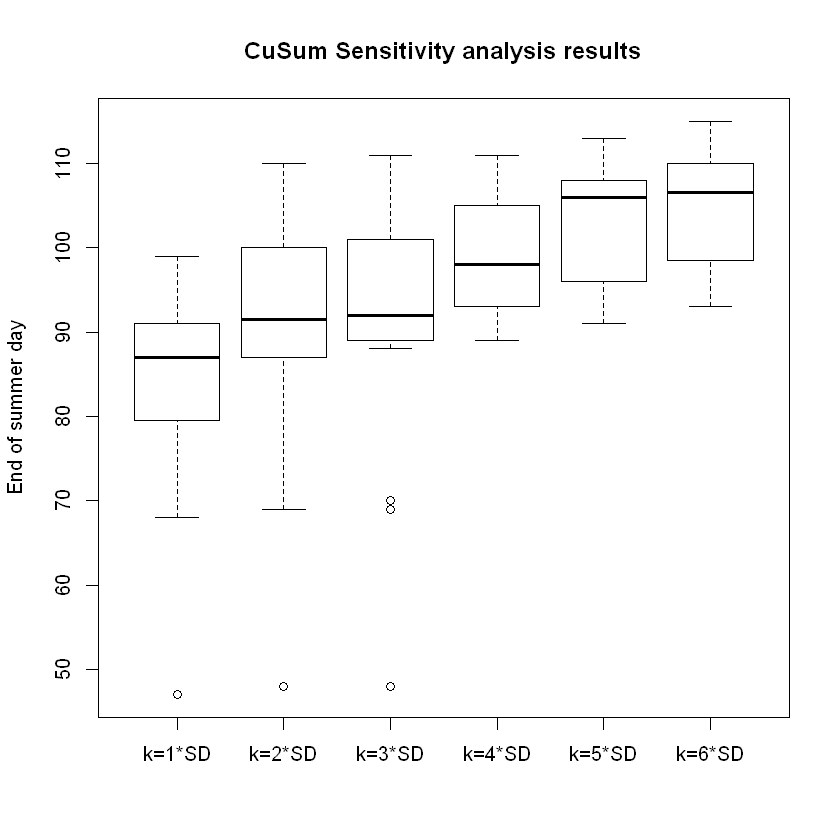

In [11]:
boxplot(result_df, ylab="End of summer day")
title("CuSum Sensitivity analysis results")

<p><p style="page-break-after:always;"></p></p>

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


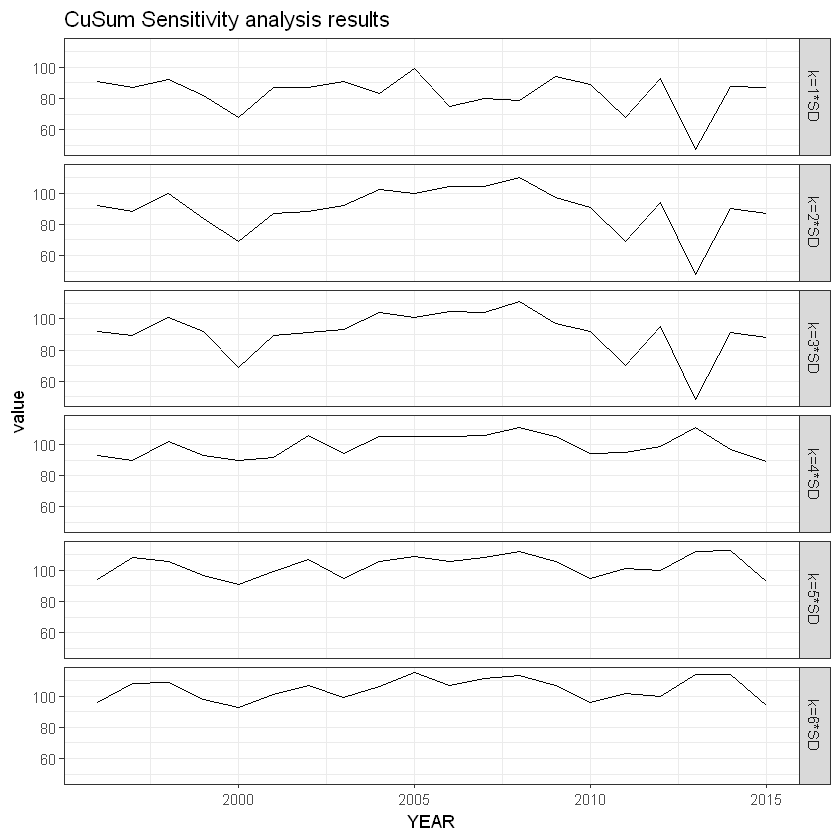

In [12]:
# plot results
library(ggplot2)
library(reshape2)
# plot dataframe
plot_df <- as.data.frame(result_df)
plot_df$YEAR <- 1996:2015
# melt Df
plot_df <- melt(plot_df ,  id.vars = 'YEAR', variable.name = 'series')
#create line plot for each column in data frame
ggplot(plot_df, aes(YEAR, value)) +
  geom_line() +
  facet_grid(series ~ .)+
  ggtitle("CuSum Sensitivity analysis results")+
  labs(x="YEAR", Y="DAY")+
  theme_bw()

From the Boxplot, the line plots and the table above, 
1. With K= 1 * SD (K=8.6), the inter-quartile range (IQR) lies within an acceptable range (day 80 - 90) with tails extending between days 70 and 100 and 1 outlier.
2. Increasing the K value up to 3 * SD doesnot help the outliers but it slows the detection of end of summer in other years. 
3. Increasing k-value a lot delays the detection of summer significantly until with  K= 6*SD, end of summer detected in late october (not aligned with average temperature analysis before)
4. The year 2013 is always plotting as an outlier (DAY = 46-48) until k >= 4*SD. Details below

From the chart below for the year 2013,
1. Analysis from the chart below showed outliers around day 45, without smoothing the data or removing these data points, tweaking the model to skip these points will result in significant delay in detecting the end of summer. 
2. Visual inspection also showed end of summer is around DAY 80-90 without the outliers.

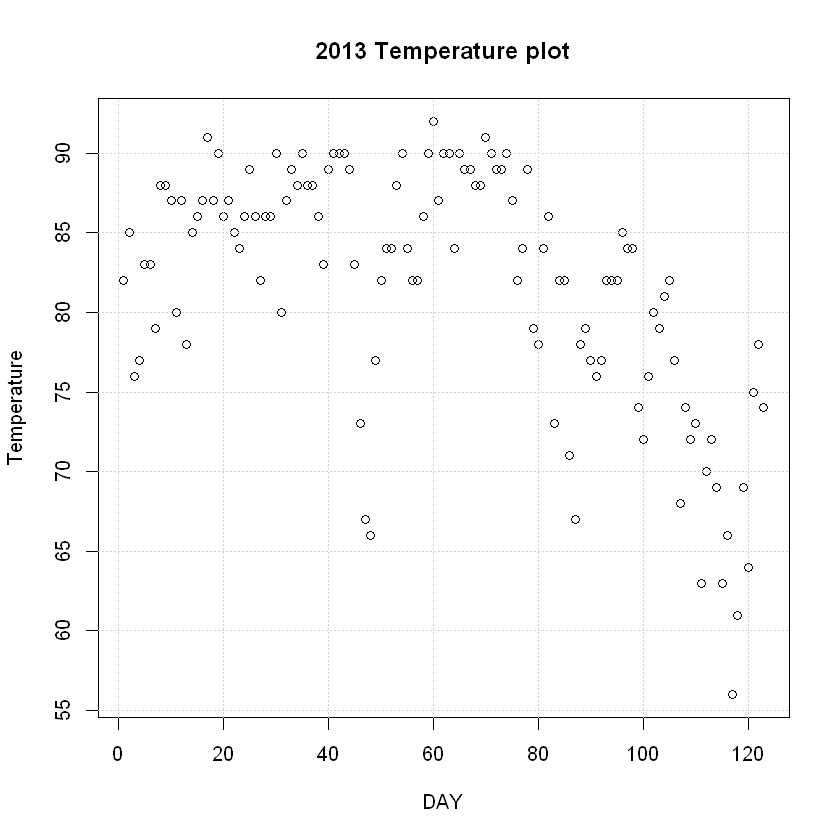

In [13]:
plot(new_df$DAY, new_df$X2013, xlab="DAY", ylab="Temperature")
grid()
title("2013 Temperature plot")

<p><p style="page-break-after:always;"></p></p>

<b> Conclusions </b>

1. The End of Summer of each year is best determined using Cusum approach using C= 0.5 SD and K = 1 SD.
3. The lower average temperatures of October Month lowers the mean and thus a relatively low threshold K = 1 SD is required.
3. The analysis shows end of summer to be typically between day 80 and 90 (18 and 28th of September) with a maximum range between 6th of September and 7th of October (Day 69 - 99).
4. Years with outliers in temperature, e.g. 2013, can be better handled using data smoothing techniques.

<p><p style="page-break-after:always;"></p></p>

<h2>Answr 6.2 Part 2</h2>

Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).

In my solution, I assume that the average temperature from July to October for each year is an indiactor of the annual average summer temperature.

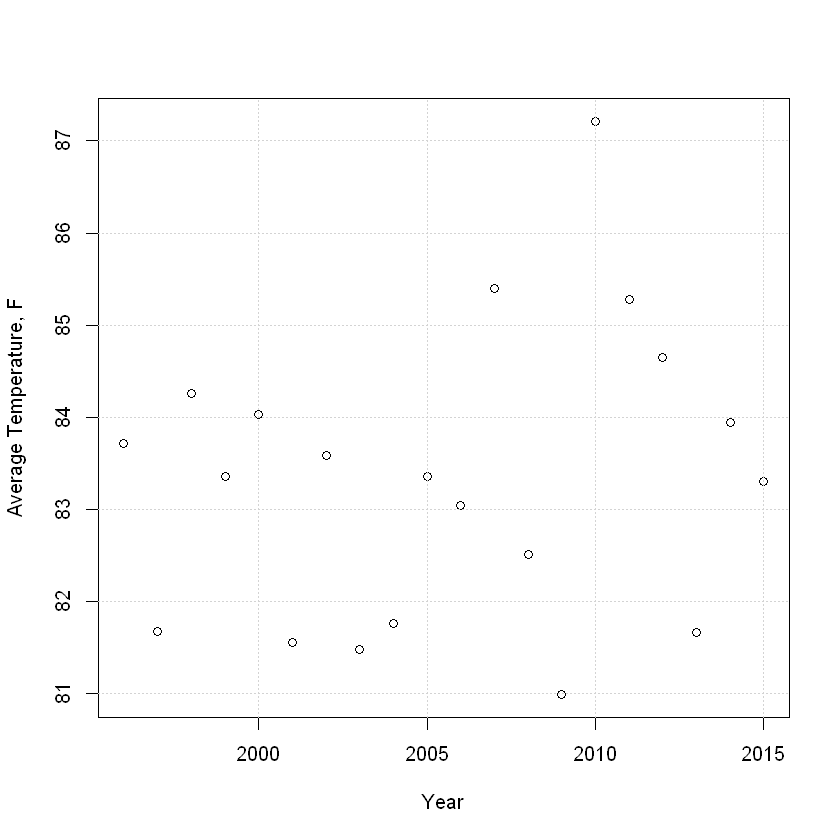

In [14]:
# convert annual data to average temperature (Note exclude column 1 "DAY")
mean_temp_df <- as.data.frame(colMeans(df[,2:ncol(df)]))
# Define years vector
mean_temp_df$year <- seq(1996,2015)
#change columns names
colnames(mean_temp_df) <- c("AVG_temp", "YEAR")
# plot results
plot(mean_temp_df$YEAR, mean_temp_df$AVG_temp, xlab="Year", ylab="Average Temperature, F")
grid()

From the plot, it can be seen that starting at 2010 (except 2013), there seems to be an increase in average temperature

In [15]:
# calculate mean temperature of all data
mean_temp <- mean(mean_temp_df$AVG_temp)
print("Mean temperature of all data")
round(mean_temp,2)
sd_temp <- sd(mean_temp_df$AVG_temp)
print("Mean temperature of all data")
round(sd_temp,2)

[1] "Mean temperature of all data"


[1] 83.34

[1] "Mean temperature of all data"


[1] 1.58

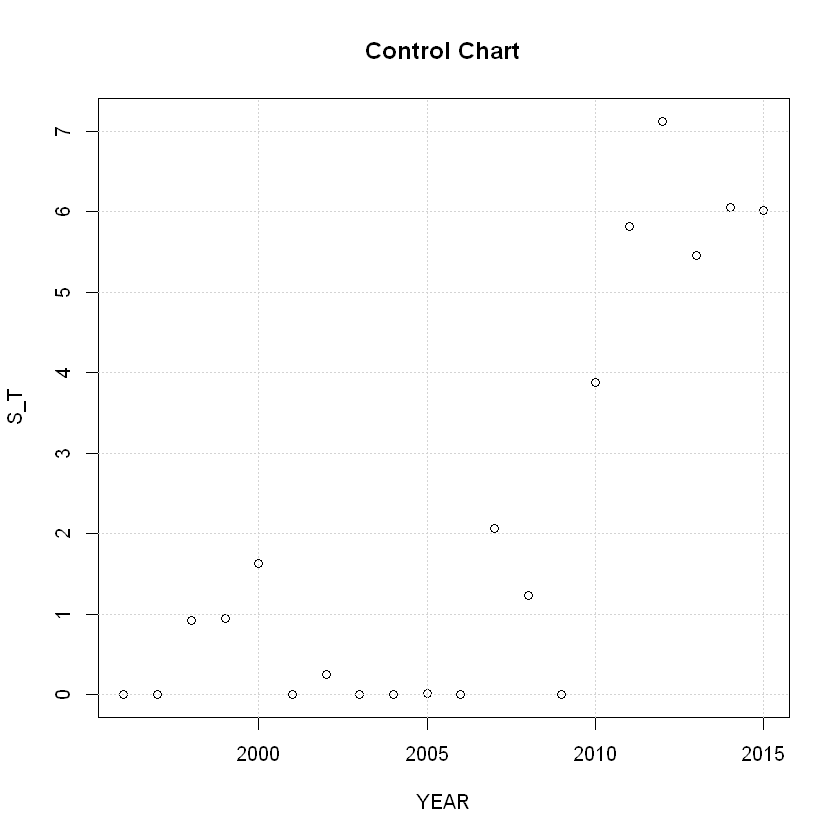

In [16]:
# number of observations
N <- nrow(mean_temp_df)
# initialize CuSum Metric St
S_T <- seq(1,N)
S_T[1] <- 0
# loop for all points
for (i in 2:N){
    S_T[i] <- max(0, S_T[i-1]+(mean_temp_df[i,"AVG_temp"]-mean_temp))
}
# add S_T to dataframe
mean_temp_df$S_T <- S_T
# plot Results
plot(mean_temp_df$YEAR, mean_temp_df$S_T, xlab="YEAR", ylab="S_T")
title("Control Chart")
grid()

From the control chart, 2010 onwards shows a change. A threshold of the change could be assigned to be 3

In [17]:
# find year where change is detected assuming threshold is zero
print("Change detected with Threshold > 3")
mean_temp_df[mean_temp_df$S_T>=3,][1,"YEAR"]


[1] "Change detected with Threshold > 3"


[1] 2010

<p><p style="page-break-after:always;"></p></p>

Sensitivity Analysis for C and Threshold

In [18]:
# vectors to store data
S_T_used <- seq(1,25)
C_used <- (seq(1,25))
result <- seq(1,25)
# Counter for the loops
counter <- 1
# loop through the sentivity
for (C in seq(0,4)) {
for (S_T_threshold in seq(1,6)) {
    # number of observations
    N <- nrow(mean_temp_df)
    # initialize CuSum Metric St
    S_T <- seq(1,N)
    S_T[1] <- 0
    # loop for all points
    for (i in 2:N){
        S_T[i] <- max(0, S_T[i-1]+(mean_temp_df[i,"AVG_temp"]-mean_temp-C))
    }
    # add S_T to dataframe
    mean_temp_df$S_T <- S_T
    S_T_used[counter] <- S_T_threshold
    C_used[counter] <- C
    result[counter] <- mean_temp_df[mean_temp_df$S_T>=S_T_threshold,][1,"YEAR"]
    # counter
    counter <- counter + 1
}}
result_df <- data.frame(S_T_used, C_used, result)

In [19]:
result_df

S_T_used,C_used,result
1,0,2000
2,0,2007
3,0,2010
4,0,2011
5,0,2011
6,0,2012
1,1,2007
2,1,2010
3,1,2011
4,1,2012


<p><p style="page-break-after:always;"></p></p>

From the sensitivity analysis above:
1. Any value of C >=2 results in no change detected. This is due to the maximum difference between the mean and the data points is +/- 3 degree F.
2. With C=0 and Threshold <=2 and C=1 and Threshold =1, 2000 and 2007 are detected as the start of change. However, visual inspection of the Control chart shows 2000 as a False alaram and probably the same applies for 2007.
3. Mutiple other combinations of C and threshold (e.g. C=3 Threshold=0) shows the change starting at either 2010 or 2011.
4. Some models suggest also 2012 as the start of the climate becoming warmer in summer (Highest confirmation)

<b> In Conclusion, 2010 up to 2012 marks an incerease in Atlanta’s summer temperature </b>